In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
eda_data=pd.read_csv(r"C:\Users\31syl\Desktop\FRiskDetect\eda_data.csv")

In [4]:
eda_data.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1,1,1,1,Laborers,2,Business Entity Type 3,25,1.74
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1,1,1,1,Core staff,1,School,45,3.25
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1,1,1,1,Laborers,2,Government,52,0.62


In [5]:
import seaborn as sns
sns.set(style="ticks")

In [6]:
num_features = []
cat_features = []

for col, dtype in eda_data.dtypes.items():
    if dtype == "object":
        cat_features.append(col)
    else:
        num_features.append(col)

print("Numerical features:", num_features)
print("         ")
print("Categorical features:", cat_features)

Numerical features: ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'AGE', 'YEARS_EMPLOYED']
         
Categorical features: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


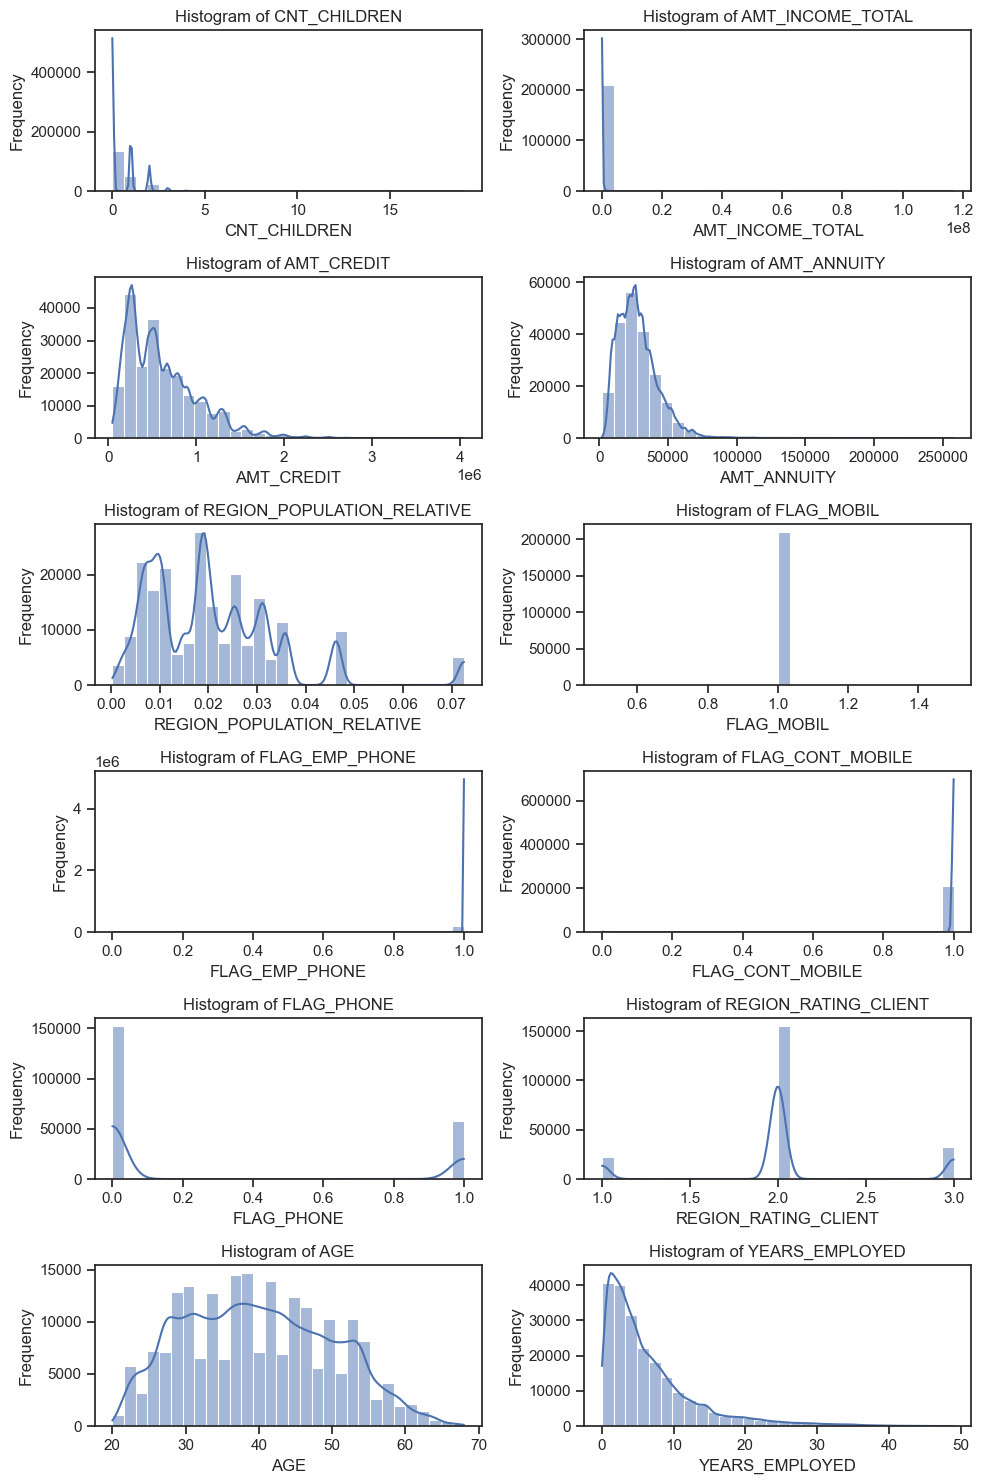

In [7]:
num_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL',
                 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'AGE', 'YEARS_EMPLOYED']

# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(num_features):
    # Create histogram for each feature
    sns.histplot(eda_data[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots if there are fewer features than the number of subplots
for j in range(len(num_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

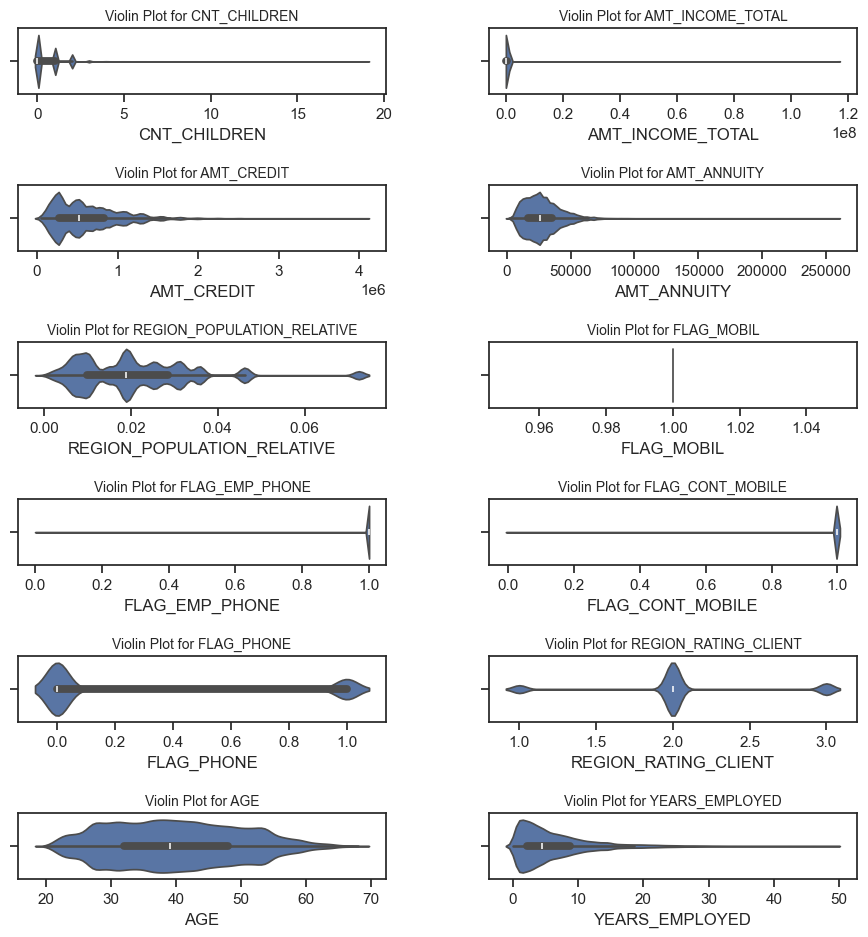

In [8]:
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(10,10)
plt.tight_layout(pad=3.50)

num_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
                'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
                'AGE', 'YEARS_EMPLOYED']

# Loop through columns and create box plots
for i, col in enumerate(num_features):
    sns.violinplot(x=eda_data[col], ax=axes[i//2, i%2])  # Adjusting indexing for subplots
    axes[i//2, i%2].set_title(f'Violin Plot for {col}', fontsize=10)

# Adjust the plot numbers
for j in range(len(num_features), len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.show()

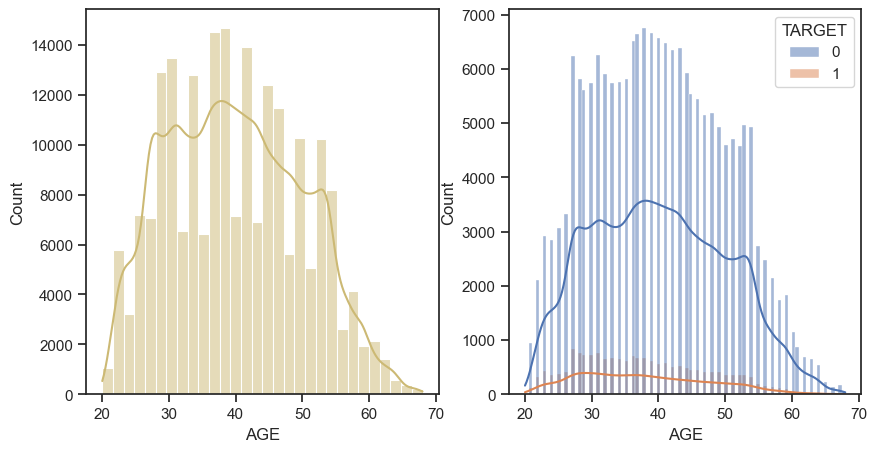

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(121)
sns.histplot(data=eda_data,x='AGE',bins=30,kde=True,color='y')
plt.subplot(122)
sns.histplot(data=eda_data,x='AGE',kde=True,hue='TARGET')
plt.show()

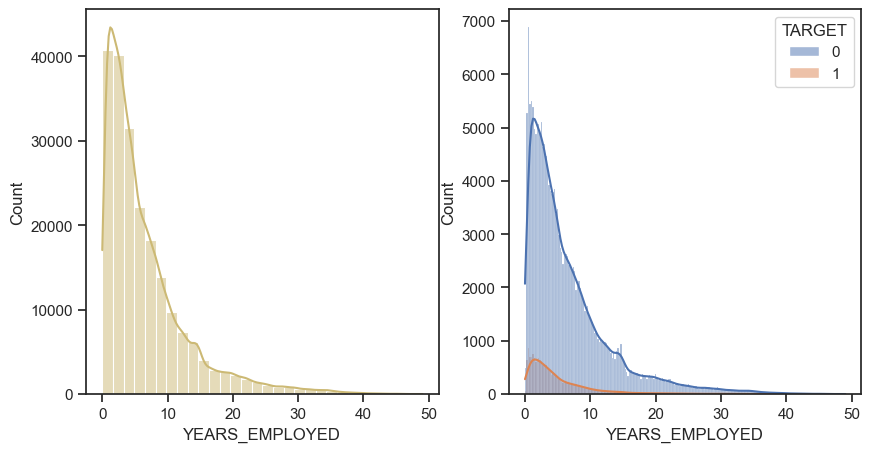

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(121)
sns.histplot(data=eda_data,x='YEARS_EMPLOYED',bins=30,kde=True,color='y')
plt.subplot(122)
sns.histplot(data=eda_data,x='YEARS_EMPLOYED',kde=True,hue='TARGET')
plt.show()

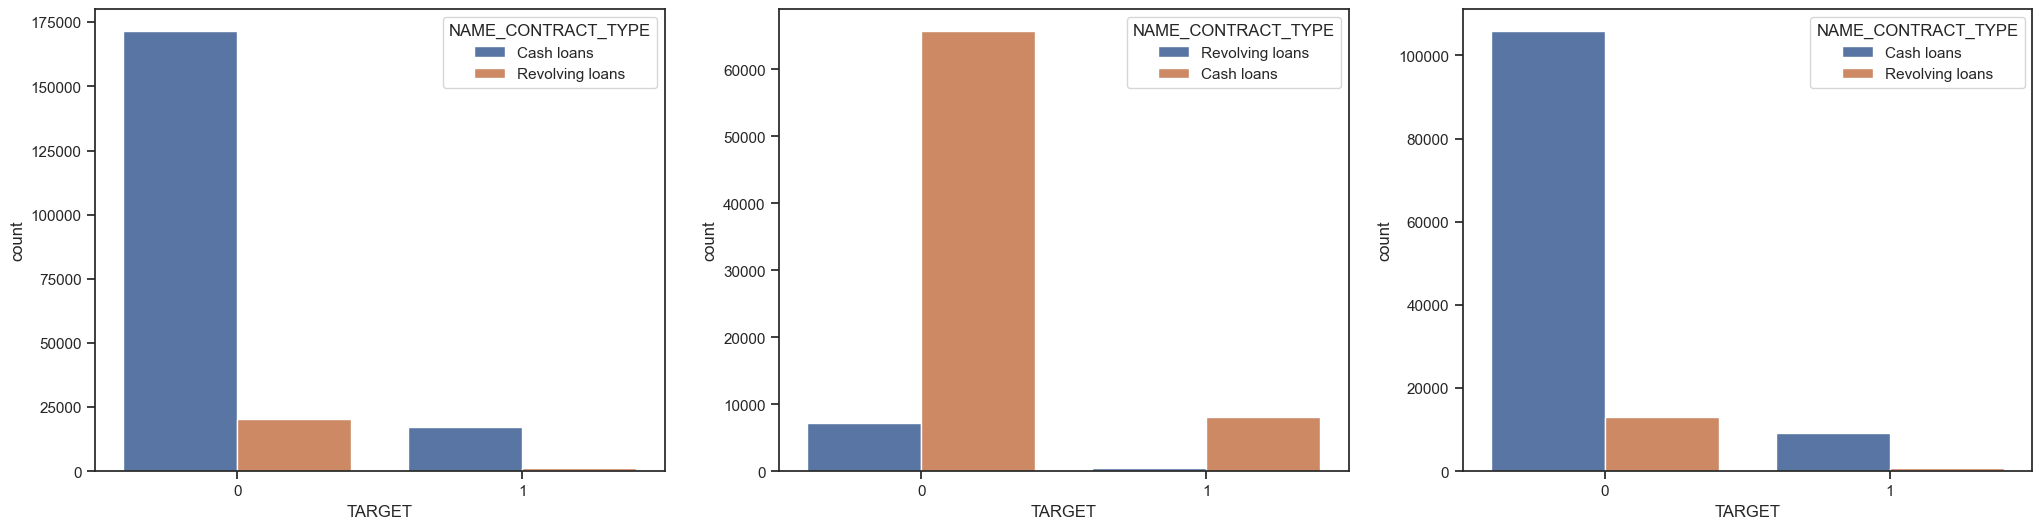

In [19]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
ax = sns.countplot(data=eda_data, x='TARGET', hue='NAME_CONTRACT_TYPE')
plt.subplot(132)
ax = sns.countplot(data=eda_data[eda_data['CODE_GENDER'] == 'M'], x='TARGET', hue='NAME_CONTRACT_TYPE')
plt.subplot(133)
ax = sns.countplot(data=eda_data[eda_data['CODE_GENDER'] == 'F'], x='TARGET', hue='NAME_CONTRACT_TYPE')
plt.show()

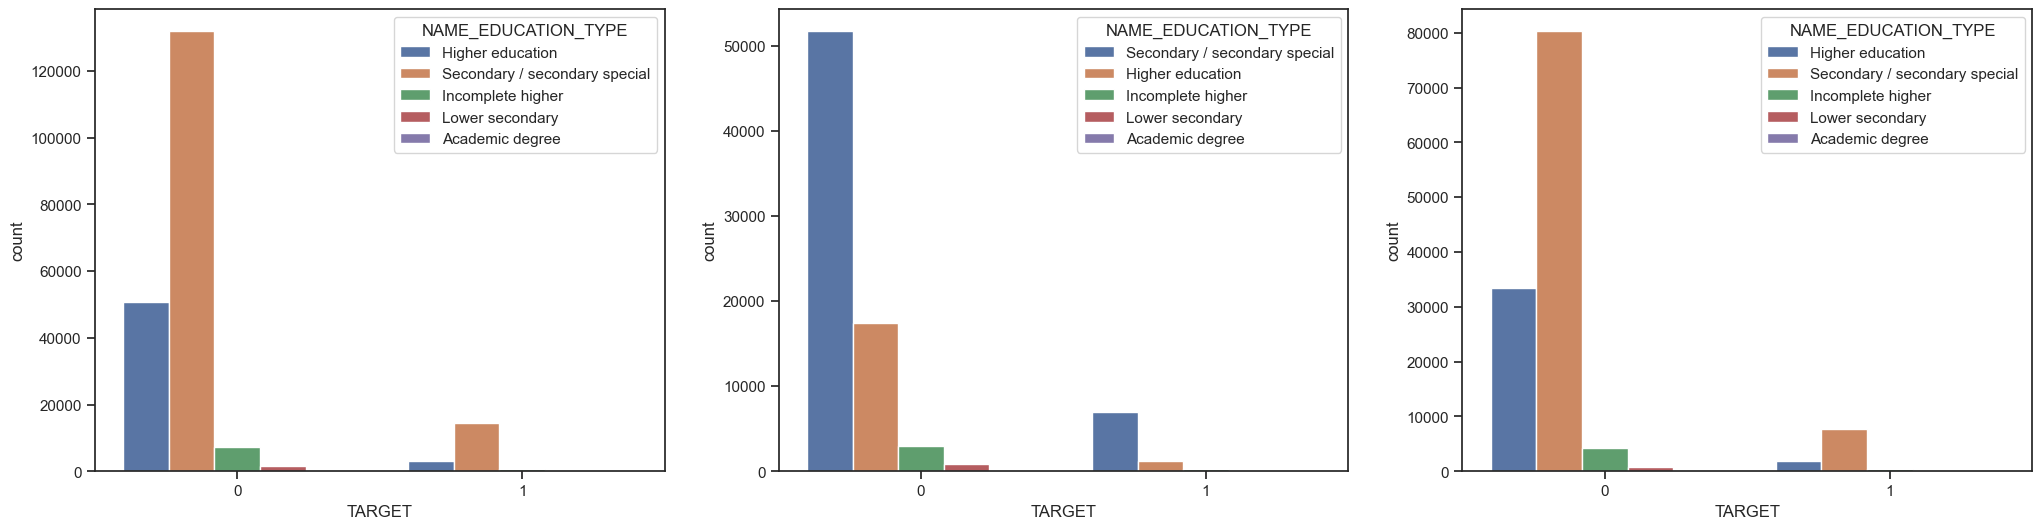

In [18]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
ax = sns.countplot(data=eda_data, x='TARGET', hue='NAME_EDUCATION_TYPE')
plt.subplot(132)
ax = sns.countplot(data=eda_data[eda_data['CODE_GENDER'] == 'M'], x='TARGET', hue='NAME_EDUCATION_TYPE')
plt.subplot(133)
ax = sns.countplot(data=eda_data[eda_data['CODE_GENDER'] == 'F'], x='TARGET', hue='NAME_EDUCATION_TYPE')
plt.show()

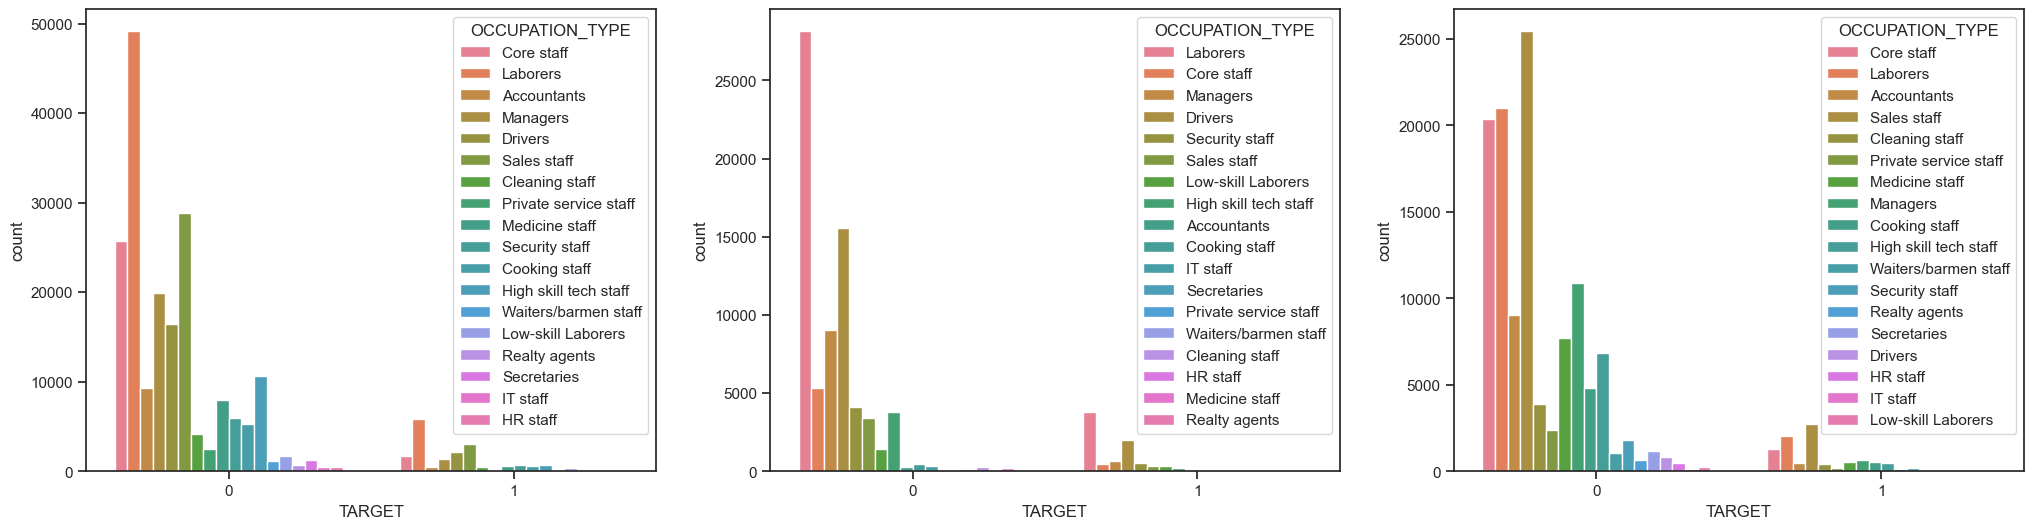

In [20]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
ax = sns.countplot(data=eda_data, x='TARGET', hue='OCCUPATION_TYPE')
plt.subplot(132)
ax = sns.countplot(data=eda_data[eda_data['CODE_GENDER'] == 'M'], x='TARGET', hue='OCCUPATION_TYPE')
plt.subplot(133)
ax = sns.countplot(data=eda_data[eda_data['CODE_GENDER'] == 'F'], x='TARGET', hue='OCCUPATION_TYPE')
plt.show()

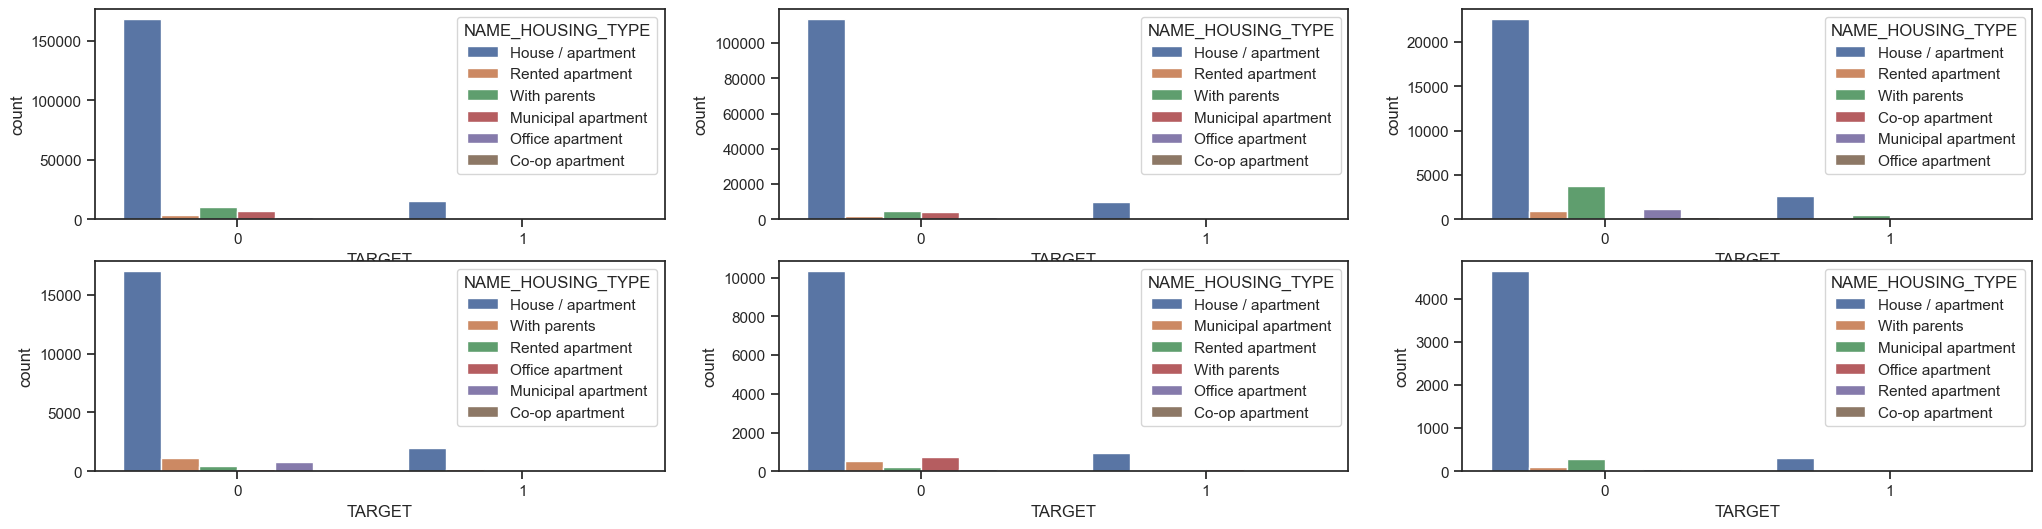

In [21]:
plt.subplots(2, 3, figsize=(25, 6))

plt.subplot(231)
ax = sns.countplot(data=eda_data, x='TARGET', hue='NAME_HOUSING_TYPE')

plt.subplot(232)
ax = sns.countplot(data=eda_data[eda_data['NAME_FAMILY_STATUS'] == 'Married'], x='TARGET', hue='NAME_HOUSING_TYPE')

plt.subplot(233)
ax = sns.countplot(data=eda_data[eda_data['NAME_FAMILY_STATUS'] == 'Single / not married'], x='TARGET', hue='NAME_HOUSING_TYPE')

plt.subplot(234)
ax = sns.countplot(data=eda_data[eda_data['NAME_FAMILY_STATUS'] == 'Civil marriage'], x='TARGET', hue='NAME_HOUSING_TYPE')

plt.subplot(235)
ax = sns.countplot(data=eda_data[eda_data['NAME_FAMILY_STATUS'] == 'Separated'], x='TARGET', hue='NAME_HOUSING_TYPE')

plt.subplot(236)
ax = sns.countplot(data=eda_data[eda_data['NAME_FAMILY_STATUS'] == 'Widow'], x='TARGET', hue='NAME_HOUSING_TYPE')

plt.show()